###Name- Siddharth Shehria
###Reg No. - 21BCE2313
###Assignment- 5

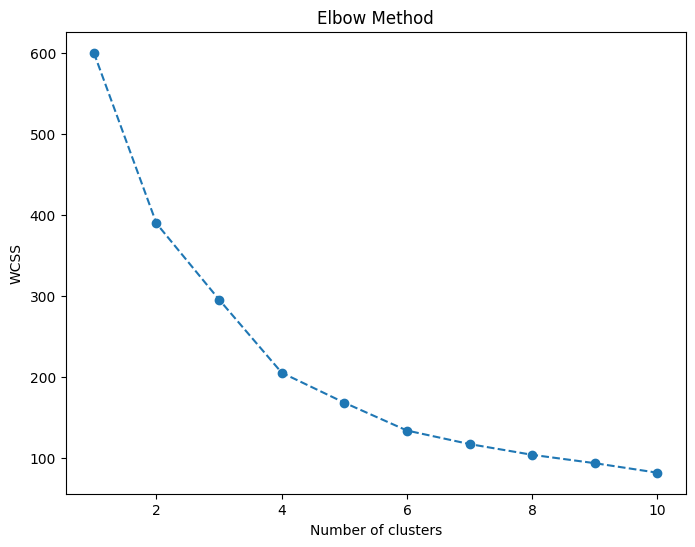

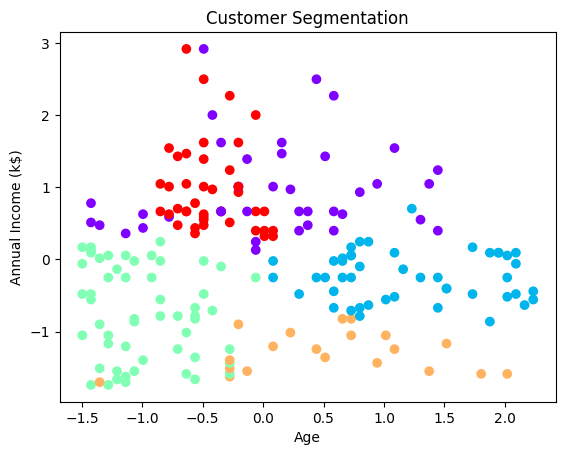

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Select the relevant features for clustering (Age, Annual Income, Spending Score)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow method
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

# Based on the Elbow method, let's choose the number of clusters (e.g., 5)
num_clusters = 5

# Apply K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataset
data['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='rainbow')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

# You can further analyze and interpret the clusters to tailor your marketing strategy.
